In [1]:
from sklearn import datasets

wine = datasets.load_wine()

print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics

n_neighbors = 15
  
X_train, X_test, y_train, y_test = train_test_split(wine.data[:, :2], 
                                                    wine.target, 
                                                    test_size=0.2, 
                                                    random_state=42)
X = X_train
y = y_train
h = .02

clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


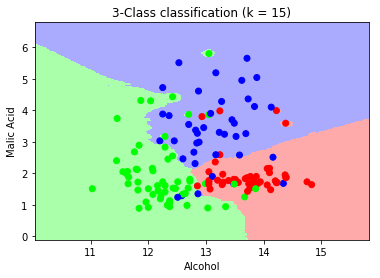

In [4]:
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
 
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()